In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
X, y = load_iris(return_X_y=True, as_frame=True)
df_raw = X
df_raw['species'] = y
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
df_raw.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
90,5.5,2.6,4.4,1.2,1
54,6.5,2.8,4.6,1.5,1
14,5.8,4.0,1.2,0.2,0
149,5.9,3.0,5.1,1.8,2
95,5.7,3.0,4.2,1.2,1
120,6.9,3.2,5.7,2.3,2
81,5.5,2.4,3.7,1.0,1
129,7.2,3.0,5.8,1.6,2
10,5.4,3.7,1.5,0.2,0
18,5.7,3.8,1.7,0.3,0


In [ ]:
df_baking = df_raw.copy()

In [ ]:
df_baking.columns = df_baking.columns.str.replace(' (cm)', '')
df_baking.columns = df_baking.columns.str.replace(' ', '_')
df_baking.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
species = {
    0: 'setosa',
    1: 'versicolor',
    2: 'virginica'
}

df_baking['species'] = df_baking['species'].replace(species)
df_baking['species'] = df_baking['species'].astype('category')

In [ ]:
df = df_baking.copy()

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.1,
                                     stratify=df['species'],
                                     random_state=2025)

df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

X_train = df_train.drop(columns=['species'])
y_train = df_train['species']
X_test = df_test.drop(columns=['species'])
y_test = df_test['species']

X_train

,sepal_length,sepal_width,petal_length,petal_width
0,6.0,2.2,5.0,1.5
1,6.0,2.2,4.0,1.0
2,5.6,2.9,3.6,1.3
3,6.9,3.1,5.1,2.3
4,6.7,3.3,5.7,2.5
...,...,...,...,...
130,6.1,2.6,5.6,1.4
131,4.9,2.5,4.5,1.7
132,4.4,3.0,1.3,0.2
133,6.1,2.8,4.7,1.2


In [ ]:
display(df_train.describe(include='number').T)
display(df_train.describe(include='category').T)

,count,mean,std,min,25%,50%,75%,max
sepal_length,135.0,5.818519,0.813798,4.3,5.10,5.8,6.4,7.9
sepal_width,135.0,3.059259,0.452076,2.0,2.80,3.0,3.4,4.4
petal_length,135.0,3.745185,1.764396,1.0,1.55,4.4,5.1,6.9
petal_width,135.0,1.200741,0.760449,0.1,0.30,1.3,1.8,2.5


,count,unique,top,freq
species,135,3,setosa,45


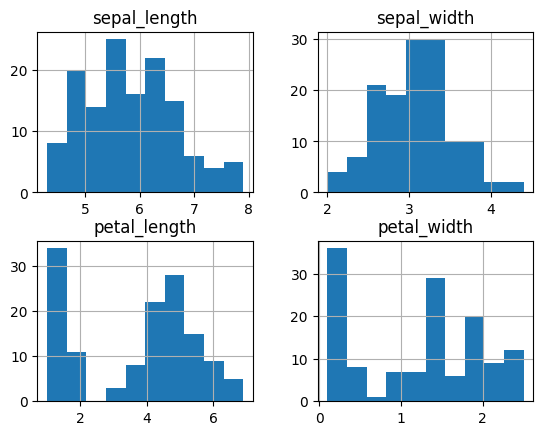

In [ ]:
df_train.hist()
plt.show()

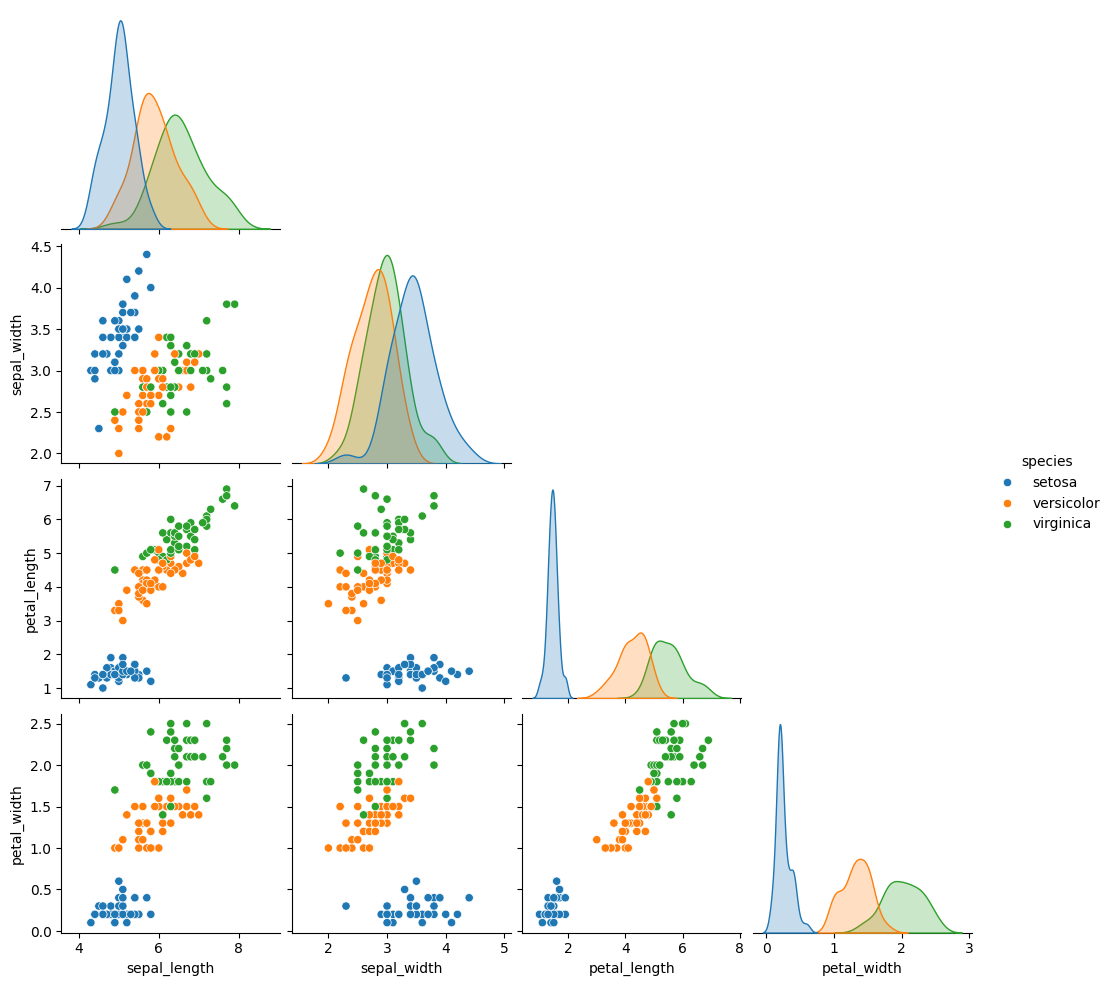

In [ ]:
sns.pairplot(data=df_train, hue='species', diag_kind='kde', corner=True)

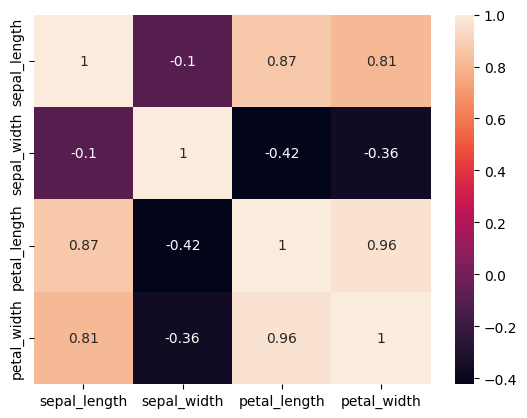

In [ ]:
sns.heatmap(data=df_train.select_dtypes('number').corr(), annot=True)
plt.show()

In [ ]:
# Machine Learning
X_train = df_train.drop(columns='species')
y_train = df_train['species']

X_test = df_test.drop(columns='species')
y_test = df_train['species']

In [ ]:
encoder = LabelEncoder()
y_train_enc = encoder.fit_transform(y_train) # FIT TRANSFORM for Learning
y_test_enc = encoder.transform(y_test) # TRANSFORM for Testing

In [ ]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train_enc)

DecisionTreeClassifier()

In [ ]:
tree_clf.get_params(<<)

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
y_hat = tree_clf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test_enc, y_hat)}')

Accuracy: 1.0


In [ ]:
tree_clf.get_depth()

5

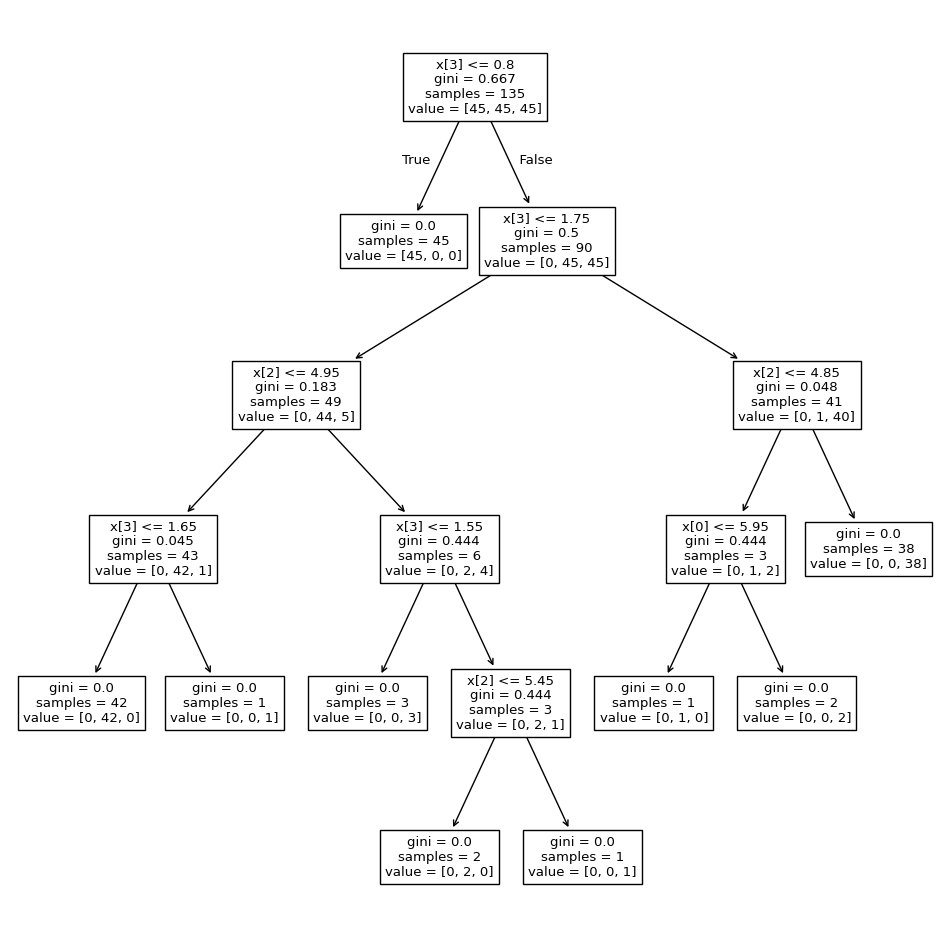

In [ ]:
plt.figure(figsize=(12, 12))
plot_tree(tree_clf)
plt.show()

Ahmed, M. et al (2020). Review and Analysis of Risk Factor of Maternal Health in Remote Area Using the Internet of Things (IoT). Conference paper InECCE2019 Lecture Notes in Electrical Engineering ((LNEE,volume 632))